In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math 

from scipy import stats

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

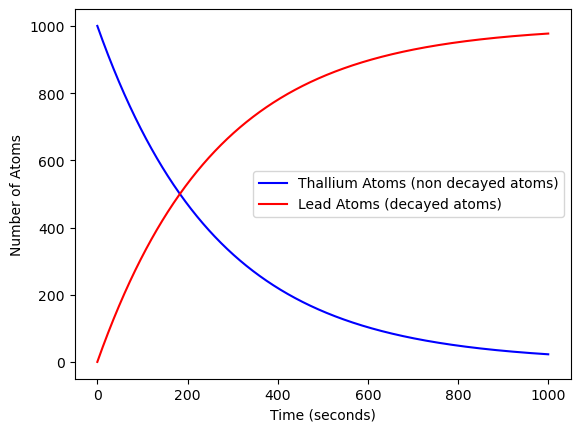

Text(0.5, 1.0, 'Histogram of not decayed atoms number distribution')

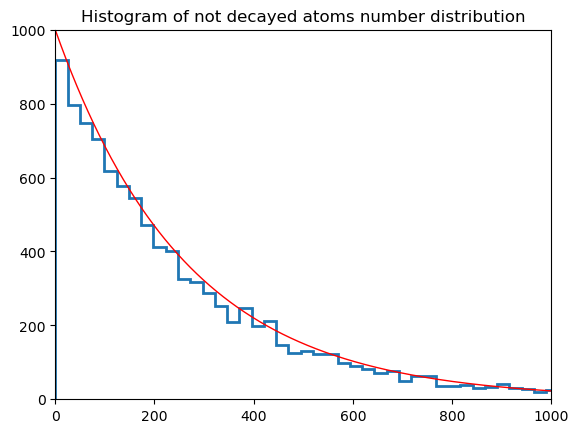

In [17]:

x = np.linspace(0, 1000, 1000) 

#Define the Probability that each atom has decayed

tau = 3.052*60 #half life in secondi

def decadeProb(time, tau=3.052*60):
    return 1. - 2**(-time/tau) 

TI = 1000 #initial number of Thallium atoms

plt.figure()
plt.plot(x, TI*(1-decadeProb(x)), color = 'blue', label='Thallium Atoms (non decayed atoms)')
plt.plot(x, TI*decadeProb(x), color = 'red', label='Lead Atoms (decayed atoms)')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of Atoms')
plt.legend(loc = 'best')
plt.show()



#costante di decadimento
def p(time, tau = 3.052*60):
    return (2**(-time/tau) * math.log(2)/tau)

def p_cdf(time, tau = 3.052*60):
    return 1. - 2**(-time/tau)

def p_icdf(y, tau=3.052*60):
    result = []
    for el in y:
        result.append(-tau * math.log(1-el, 2))
    return np.array(result)

x = np.linspace(0,1000,1000)
atoms = np.random.random(10000)
decayed_atoms = p_icdf(atoms)

plt.figure()
plt.hist(decayed_atoms, histtype='step', bins=100, density=False, linewidth=2)
plt.plot(x, TI*(1-p_cdf(x)), linewidth=1, color='red')
plt.axis([0, 1000, 0 ,1000])
plt.title("Histogram of not decayed atoms number distribution")

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

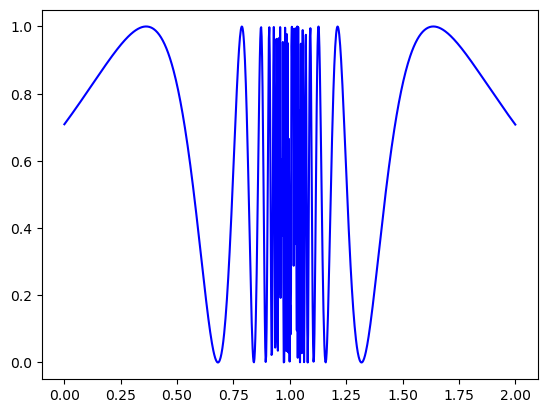

Mean of the extimation:  1.34737 
Standard Deviation of the extimation:  0.008677574545920073 

Integral with the mean value method:  1.3568881030933317 
Error of the Estimation:  0.006501822335771101 



In [14]:
def f(x):
    return (np.sin(1/(1-x)))**2

x=np.linspace(0.001, 2.0, 1000)
plt.figure()
plt.plot(x,f(x), 'b')
plt.show()

# hit/miss method

N = 10000
I = np.zeros(100)
for k in range(100):
    hit = 0
    for i in range(N):
        x = 2*np.random.random()
        y = np.random.random()
        if y < f(x): hit += 1
    I[k] = 2*hit/N
    
int_mean = np.mean(I)
int_std = np.std(I)
print('Mean of the extimation: ', int_mean, '\nStandard Deviation of the extimation: ', int_std, '\n')

# mean value method
x = np.zeros(N)
y = np.zeros(N)
for i in range(N):
    x[i] = 2*np.random.random()
    y[i] = f(x[i])

a = -1
b = 1

I_2 = ((b-a)*np.sum(y))/N
sigma = (b-a)*(math.sqrt(np.var(y))/math.sqrt(N))

print('Integral with the mean value method: ', I_2, '\nError of the Estimation: ', sigma, '\n')

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [6]:
#circle in 2d
def circle(x,y):
    if (x**2 + y**2) <= 1:
        return 1
    else:
        return 0

# Integral with hit/miss method
N = 100000
dim = 2
b = 1
a = - 1

count = 0
for i in range(N):
    x = np.random.random()
    y = np.random.random()
    z = np.random.random()
    if z <= circle(x,y):
        count += 1
        
I = (((b-a)**dim)/N)*count
print('Integral for the 2D circle with r=1 : ', I,'\n')

#Generalize the result for the 10D sphere
dim = 10

count = 0
for i in range(N):
    l = np.zeros(dim)
    for ndim in range(dim):
        l[ndim] = np.random.random()
    if np.sum(l**2) <= 1:
        count += 1

I = (((b-a)**dim)/N)*count

print('Integral for the 10th dimensional sphere: ', I, '\n')

Integral for the 2D circle with r=1 :  3.14596 

Integral for the 10th dimensional sphere:  2.75456 



4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [5]:
#def of function
def f(x):
    return ((x**(-0.5))/(np.exp(x) + 1))


#def of the weights
def w(x):
    return (1/np.sqrt(x))

def int_w(x,a,b):
    return (2*math.sqrt(b) - 2*math.sqrt(a))

N = 100000
a = 0
b = 1

#uniform random points
som = []
for i in range(N):
    x = np.random.uniform(a,b) ** 2
    som = np.append(som, (f(x)/w(x)))

#integral
I = (sum(som)/N)*int_w(x,a,b)
print('Integral with the importance sampling method: ', I, '\n')


Integral with the importance sampling method:  0.839829854071819 

